In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

df1=pd.read_excel('order_is_cash_2_hz_new.xlsx')

df2=pd.read_excel('order_is_cash_3_hz_new.xlsx')

df_train = df1.append(df2)
print('打印样本数据')

打印样本数据


In [232]:
df_train.head()

,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
0,1368.89,6,9.33,12776.33,7,4,20,28,30,5,...,76658.00,1,1220.0,4,7805.0,5,10015.0,5,10015.00,1
1,3673.66,32,1.69,6199.30,9,2,10,22,35,4,...,198377.57,1,5100.0,1,5100.0,2,9100.0,3,9120.00,1
2,4354.46,18,3.00,13063.40,12,3,16,25,42,4,...,235141.11,1,5000.0,2,10900.0,2,10900.0,4,17488.24,1
3,3935.93,11,4.73,18606.23,12,3,9,20,37,4,...,204668.48,1,5000.0,2,10000.0,2,10000.0,7,21880.00,1
4,4987.29,21,2.29,11399.52,8,2,10,26,29,5,...,239390.00,3,4700.0,5,10700.0,7,12800.0,7,12800.00,1


In [233]:
print(df_train.shape)
df_train.info()

(309, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 89
Data columns (total 26 columns):
客单价                      309 non-null float64
用户数                      309 non-null int64
总笔数/用户数                  309 non-null float64
总金额/用户数                  309 non-null float64
近12月有交易的月数               309 non-null int64
近1月交易天数                  309 non-null int64
近3月交易天数                  309 non-null int64
近6月交易天数                  309 non-null int64
近12月交易天数                 309 non-null int64
近1月交易笔数                  309 non-null int64
近1月交易总金额                 309 non-null float64
近3月交易笔数                  309 non-null int64
近3月交易总金额                 309 non-null float64
近6月交易笔数                  309 non-null int64
近6月交易总金额                 309 non-null float64
近12月交易笔数                 309 non-null int64
近12月交易总金额                309 non-null float64
近1月22:00~04:00的交易总笔数     309 non-null int64
近1月22:00~04:00的交易总金额     309 non-null float64
近3月22:00~04:00的交易总笔数     309 non-n

In [234]:
df_train.to_csv('cs_train_data_new.csv',encoding='gbk',index = False)

In [235]:
#抽取样本代码
def data_sample(inputX,index,test_Ratio=0.2):
    from random import sample
    data_array=np.atleast_1d(inputX)
    class_array=np.unique(data_array)
    test_list=[]
    train_list=[]
    for c in class_array:
        temp=[]
        for i,value in enumerate(data_array):
            if value==c:
                temp.append(index[i])
        test_list.extend(sample(temp,int(len(temp)*test_Ratio)))
    return list(set(index) - set(test_list)), test_list

def split_sample(df_train):
    train_list,test_list=data_sample(df_train['result'].tolist(),df_train.index.tolist())
    df_train_section=df_train.loc[train_list,:]
    df_test_section=df_train.loc[test_list,:]
    return df_train_section,df_test_section

df_train,df_test=split_sample(df_train)

In [236]:
print("抽取样本")
writer=pd.ExcelWriter('order_split_train_result.xlsx')
df_train.to_excel(writer,'Train',index=False)
writer.save()

df_test.to_excel('order_cs_test_data.xlsx',index=False)

抽取样本


In [237]:
def WOE_Convert(input,sp,rank):
    result=[]
    for v in input:
        for i in range(len(sp)):
            if i<len(sp)-1:
                if v>=sp[i] and v<sp[i+1]:
                    result.append(rank[i])
                    break
            else:
                if v>=sp[i]:
                    result.append(rank[i])
                else:
                    result.append(np.NaN)
    return result

In [238]:
print("通过热力图判别变量之间的相关性,热力图如下:")
import seaborn as sns

def rlt(df_train):
    corr = df_train.corr()
    xticks = list(corr.index)#x轴标签
    yticks = list(corr.index)#y轴标签
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(1, 1, 1)
    sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax1, linewidths=.5,annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})#绘制相关性系数热力图
    ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
    ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
    plt.show()


通过热力图判别变量之间的相关性,热力图如下:


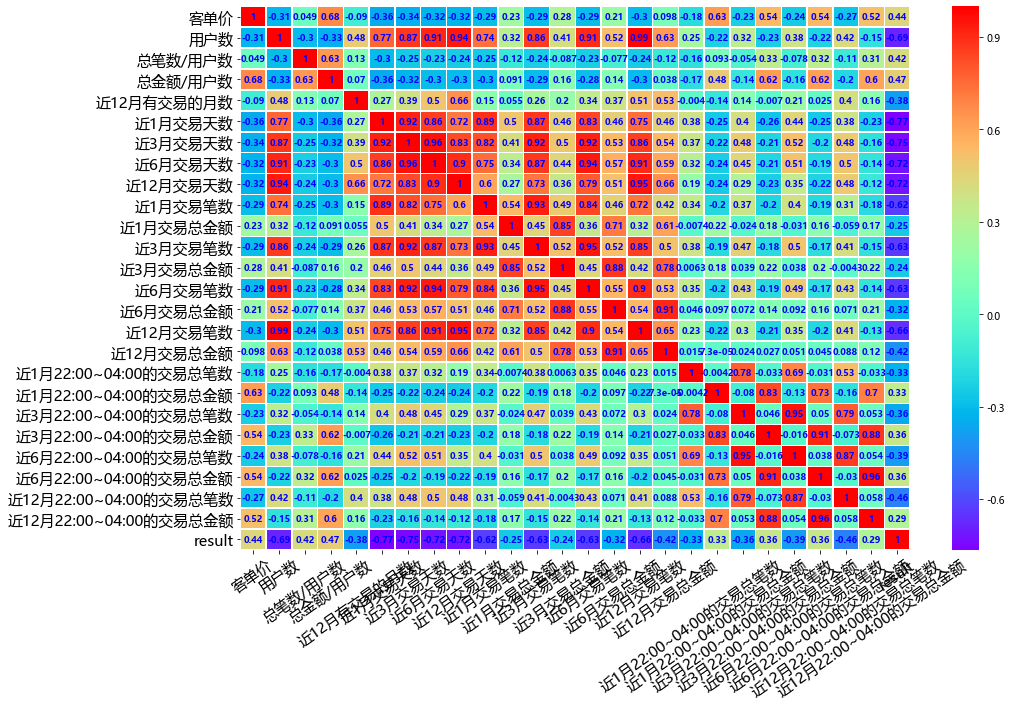

In [239]:
rlt(df_train)

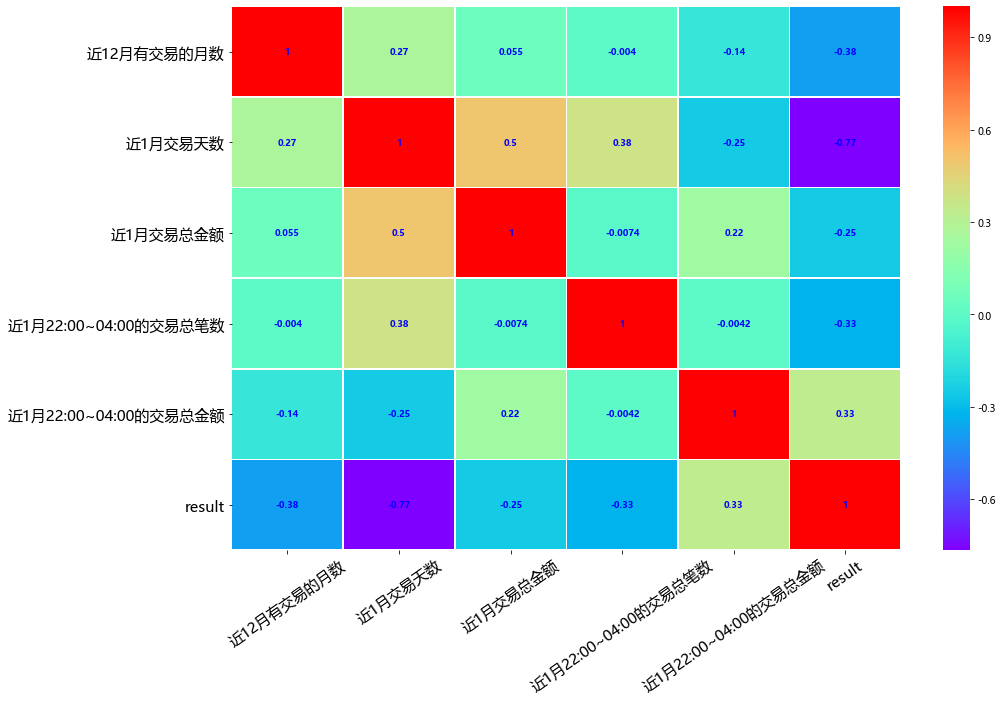

In [240]:
#一般相关系数大于0.6可以进行变量剔除。
df_train.drop(['客单价','用户数','近3月交易天数','近6月交易天数','近1月交易笔数','近3月交易笔数',
               '近6月交易笔数','近12月交易笔数','总金额/用户数','总笔数/用户数','近3月交易总金额','近6月交易总金额'
              ,'近12月交易总金额','近3月22:00~04:00的交易总笔数',
               '近3月22:00~04:00的交易总金额','近12月22:00~04:00的交易总笔数',
               '近12月22:00~04:00的交易总金额','近6月22:00~04:00的交易总金额','近6月22:00~04:00的交易总笔数','近12月交易天数']
              ,axis=1,inplace=True)
rlt(df_train)

In [241]:
print(df_train.max())

#使用python自动分箱woe转化
bins1=[0,0.1,0.3,0.7,1.0]
cut10=pd.qcut(df_train["近12月有交易的月数"],bins1,labels=False,retbins=True,duplicates='drop')
cut1=pd.qcut(df_train["近12月有交易的月数"],bins1,labels=False,duplicates='drop')
bins1=cut10[1].tolist()
# print(type(cut1))
# print(cut1.index)
# # print(cut1.name)
# print(cut1)


bins2=[0,0.2,0.5,0.7,1.0]
cut20=pd.qcut(df_train["近1月交易天数"],bins2,labels=False,retbins=True,duplicates='drop')
cut2=pd.qcut(df_train["近1月交易天数"],bins2,labels=False,duplicates='drop')
bins2=cut20[1].tolist()



bins3=[0,0.1,0.3,0.7,1.0]
cut30=pd.qcut(df_train["近1月交易总金额"],bins3,labels=False,retbins=True,duplicates='drop')
cut3=pd.qcut(df_train["近1月交易总金额"],bins3,labels=False,duplicates='drop')
bins3=cut30[1].tolist()


bins4=[0,0.1,0.3,0.9,1.0]
cut40=pd.qcut(df_train["近1月22:00~04:00的交易总笔数"],bins4,labels=False,retbins=True,duplicates='drop')
cut4=pd.qcut(df_train["近1月22:00~04:00的交易总笔数"],bins4,labels=False,duplicates='drop')
bins4=cut40[1].tolist()


bins5=[0,0.1,0.3,0.7,1.0]
cut50=pd.qcut(df_train["近1月22:00~04:00的交易总金额"],bins5,labels=False,retbins=True,duplicates='drop')
cut5=pd.qcut(df_train["近1月22:00~04:00的交易总金额"],bins5,labels=False,duplicates='drop')
bins5=cut50[1].tolist()


print(bins1)
print(pd.value_counts(cut1))

print(bins2)
print(pd.value_counts(cut2))

print(bins3)
print(pd.value_counts(cut3))

print(bins4)
print(pd.value_counts(cut4))

print(bins5)
print(pd.value_counts(cut5))


近12月有交易的月数                  12.00
近1月交易天数                     31.00
近1月交易总金额                182160.02
近1月22:00~04:00的交易总笔数        10.00
近1月22:00~04:00的交易总金额     23605.00
result                       1.00
dtype: float64
[1.0, 3.0, 6.5, 12.0]
1    82
0    69
2    65
Name: 近12月有交易的月数, dtype: int64
[1.0, 3.0, 5.0, 31.0]
0    121
2     58
1     37
Name: 近1月交易天数, dtype: int64
[10.0, 1004.36, 4815.969999999999, 18864.004999999997, 182160.02]
2    86
3    65
1    43
0    22
Name: 近1月交易总金额, dtype: int64
[1.0, 2.5, 10.0]
0    194
1     22
Name: 近1月22:00~04:00的交易总笔数, dtype: int64
[10.0, 140.0, 954.0, 4999.0, 23605.0]
2    86
3    65
1    43
0    22
Name: 近1月22:00~04:00的交易总金额, dtype: int64


In [242]:

print("df_train['result']:"+str(df_train['result'].count()))

# df_train_bad=df_train[df_train['result']==1]

# bad=df_train_bad['result'].count()

# print("bad:"+str(bad))
# good=df_train['result'].count()-bad
# print("good:"+str(good))
# rs=bad/good
# print("套现与非套现的比值:"+str(rs))

rate=df_train["result"].sum()/( df_train["result"].count()-df_train["result"].sum() )
print("套现与非套现的比值:"+str(rate))

df_train['result']:216
套现与非套现的比值:2.9272727272727272


In [243]:
#unstack 是将列转行
def get_woe_data(cut):
    grouped=df_train["result"].groupby(cut,as_index = True).value_counts()
#     print(grouped)
#     print(type(grouped))
#     print(type(grouped.unstack()))
#     print(grouped.unstack())
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe


cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)

print(cut1_woe)
print(cut2_woe)
print(cut3_woe)
print(cut4_woe)
print(cut5_woe)

近12月有交易的月数
0    0.294205
1    0.790713
2   -0.919920
dtype: float64
近1月交易天数
0    2.070081
1    1.036142
2   -2.417806
dtype: float64
近1月交易总金额
0   -0.311931
1    0.255065
2    0.255065
3   -0.334404
dtype: float64
近1月22:00~04:00的交易总笔数
0    0.212140
1   -1.441796
dtype: float64
近1月22:00~04:00的交易总金额
0   -0.891750
1   -1.498954
2    0.563538
3    1.410835
dtype: float64


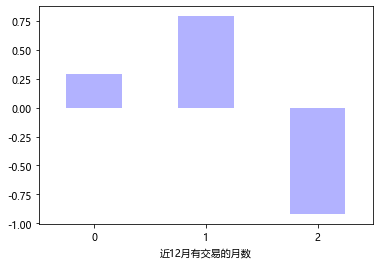

In [244]:
cut1_woe.plot.bar(color='b',alpha=0.3,rot=0)

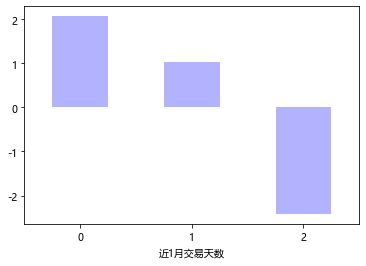

In [245]:
cut2_woe.plot.bar(color='b',alpha=0.3,rot=0)

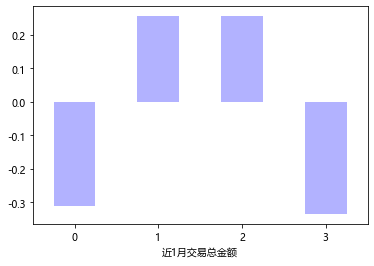

In [246]:
cut3_woe.plot.bar(color='b',alpha=0.3,rot=0)

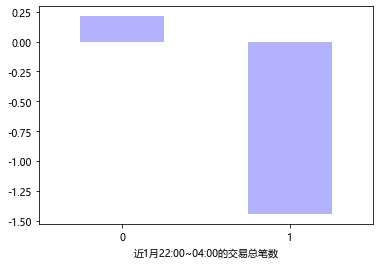

In [247]:
cut4_woe.plot.bar(color='b',alpha=0.3,rot=0)

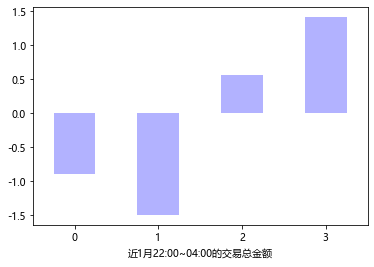

In [248]:
cut5_woe.plot.bar(color='b',alpha=0.3,rot=0)

cut1_IV: 0.5179653647924483


Text(0, 0.5, 'IV')

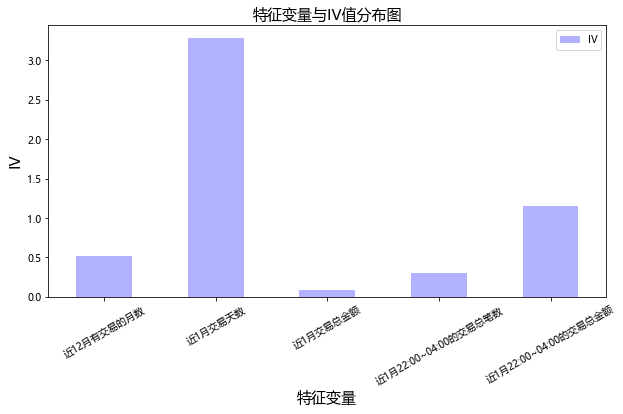

In [249]:
def get_IV_data(cut,cut_woe):
    grouped=df_train["result"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df_train["result"].sum()-
               grouped.unstack().iloc[:,0]/(df_train["result"].count()-df_train["result"].sum()))*cut_woe).sum()    
    return cut_IV

#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)

print("cut1_IV:",cut1_IV)

IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV],index=
                ['近12月有交易的月数','近1月交易天数','近1月交易总金额',
                 '近1月22:00~04:00的交易总笔数','近1月22:00~04:00的交易总金额'],columns=['IV'])

iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))

iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))

iv.set_ylabel('IV',fontsize=(15))




In [250]:
IV
#一般选取IV大于0.02的特征变量进行后续训练

,IV
近12月有交易的月数,0.517965
近1月交易天数,3.282275
近1月交易总金额,0.083310
近1月22:00~04:00的交易总笔数,0.298474
近1月22:00~04:00的交易总金额,1.152083


In [251]:
# WOE值替换
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
   
    return cut

df_new["result"]=df_train["result"]
df_new["近12月有交易的月数"]=replace_data(cut1,cut1_woe)
df_new["近1月交易天数"]=replace_data(cut2,cut2_woe)
df_new["近1月交易总金额"]=replace_data(cut3,cut3_woe)
df_new["近1月22:00~04:00的交易总笔数"]=replace_data(cut4,cut4_woe)
df_new["近1月22:00~04:00的交易总金额"]=replace_data(cut5,cut5_woe)


In [252]:
df_new.head()

,result,近12月有交易的月数,近1月交易天数,近1月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额
0,1,-0.91992,1.036142,0.255065,0.212140,0.563538
0,0,-0.91992,-2.417806,-0.334404,0.212140,-1.498954
2,1,-0.91992,2.070081,0.255065,0.212140,1.410835
2,0,-0.91992,-2.417806,-0.334404,-1.441796,-1.498954
3,1,-0.91992,2.070081,0.255065,0.212140,1.410835


In [253]:
# logistic模型回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)

print("x_train:",x_train)
print("x_test:",x_test)
print("y_train:",y_train)
print("y_test:",y_test)

model=LogisticRegression()
clf=model.fit(x_train,y_train)

print('测试成绩：{}'.format(clf.score(x_test,y_test)))

x_train:      近12月有交易的月数   近1月交易天数  近1月交易总金额  近1月22:00~04:00的交易总笔数  \
215    0.294205  2.070081  0.255065              0.212140   
18    -0.919920 -2.417806  0.255065              0.212140   
60    -0.919920  2.070081  0.255065              0.212140   
80    -0.919920  2.070081  0.255065             -1.441796   
112    0.294205  1.036142  0.255065              0.212140   
180    0.790713  2.070081  0.255065              0.212140   
216    0.294205  2.070081 -0.311931              0.212140   
5     -0.919920  2.070081  0.255065              0.212140   
50    -0.919920  2.070081  0.255065              0.212140   
66    -0.919920  2.070081  0.255065              0.212140   
101    0.790713  2.070081  0.255065              0.212140   
204    0.294205  2.070081  0.255065              0.212140   
192    0.294205  1.036142  0.255065              0.212140   
178    0.790713  2.070081 -0.334404              0.212140   
173    0.790713  2.070081  0.255065              0.212140   
154    0.790713

e:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [254]:
# 求特征权值系数coe，后面训练结果转分值时会用到：

coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[0.45649628, 1.18470277, 0.79922204, 0.35718785, 0.89680986]])

In [255]:
y_pred=clf.predict(x_test)

In [256]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

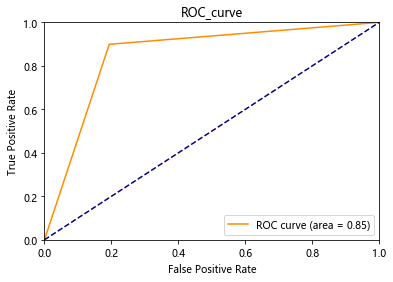

In [257]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [258]:
roc_auc
#根据前辈们的经验，AUC大于0.75的时候，模型是比较可靠的。

0.8527207559465624

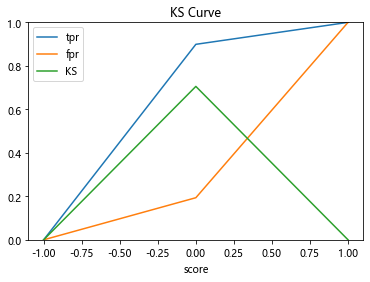

<Figure size 1440x1440 with 0 Axes>

In [259]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [260]:
max(tpr-fpr)
#K-S值一般是很难达到0.6的，在0.2~0.6之间都不错

0.7054415118931248

In [261]:
# 模型结果转评分
# 假设好坏比为20的时候分数为600分，每高20分好坏比翻一倍
# 现在我们求每个变量不同woe值对应的分数刻度可得：

factor = 20 / np.log(2)
offset = 600 - 20 * np.log(20) / np.log(2)

def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

print(coe)
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)


print("近12月有交易的月数:{}".format(x1))
print("近1月交易天数:{}".format(x2))
print("近1月交易总金额:{}".format(x3))
print("近1月22:00~04:00的交易总笔数:{}".format(x4))
print("近1月22:00~04:00的交易总金额:{}".format(x5))



[[0.45649628 1.18470277 0.79922204 0.35718785 0.89680986]]
近12月有交易的月数:[4.0, 10.0, -12.0]
近1月交易天数:[71.0, 35.0, -83.0]
近1月交易总金额:[-7.0, 6.0, 6.0, -8.0]
近1月22:00~04:00的交易总笔数:[2.0, -15.0]
近1月22:00~04:00的交易总金额:[-23.0, -39.0, 15.0, 37.0]


In [262]:
def compute_score(series,bins,score):
#     print(score)
#     print(bins)
    list = []
    i = 0
    while i < len(series):
        value = series[i]
#         print(value)
        j = len(bins) - 2
        m = len(bins) - 2
#         print("j=",j)
#         print("m=",m)
        while j >= 0:
            if value >= bins[j]:
#               j = -1
                break
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

path2=r'order_cs_test_data.xlsx'


test1 = pd.read_excel(path2)


test1['x1'] = pd.Series(compute_score(test1['近12月有交易的月数'], bins1, x1))
test1['x2'] = pd.Series(compute_score(test1['近1月交易天数'], bins2, x2))
test1['x3'] = pd.Series(compute_score(test1['近1月交易总金额'], bins3, x3))
test1['x4'] = pd.Series(compute_score(test1['近1月22:00~04:00的交易总笔数'], bins4, x4))
test1['x5'] = pd.Series(compute_score(test1['近1月22:00~04:00的交易总金额'],bins5, x5))


test1['Score'] = test1['x1']+test1['x2']+test1['x3']+test1['x4']+test1['x5']+600
test1.to_excel(r'2019-07-17-ScoreData.xlsx', index=False)

In [263]:
score_data = pd.read_excel('2019-07-17-ScoreData.xlsx')
score_data

,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result,x1,x2,x3,x4,x5,Score
0,5524.12,7,2.43,13415.71,9,1,3,11,17,1,...,9000.00,2,9000.00,1,-12,71,6,2,15,682
1,79.00,17,1.00,79.00,1,12,12,12,12,17,...,106.00,2,106.00,0,4,-83,6,2,-23,506
2,1134.64,3,6.33,7186.03,4,2,3,11,11,2,...,93.00,2,93.00,1,10,71,6,2,-23,666
3,237.05,43,1.07,253.59,2,18,19,19,19,45,...,756.00,3,756.00,0,4,-83,6,-15,-39,473
4,6331.52,15,1.93,12240.93,6,4,11,22,25,4,...,5000.00,1,5000.00,1,10,35,6,2,37,690
5,1047.29,169,1.19,1245.59,12,10,27,72,130,13,...,340.00,3,1862.00,0,-12,-83,-8,2,-39,460
6,2632.65,4,5.00,13163.25,3,6,19,19,19,6,...,15520.00,5,15520.00,1,10,-83,6,2,37,572
7,156.80,54,1.13,177.13,10,8,22,31,53,8,...,3090.00,29,4406.00,0,-12,-83,6,-15,-39,457
8,3445.11,4,4.50,15503.00,6,2,6,16,16,2,...,12200.00,4,12200.00,1,10,71,6,2,37,726
9,284.46,23,1.13,321.57,1,18,18,18,18,26,...,70.00,1,70.00,0,4,-83,6,2,-23,506
